In [64]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

sns.set_theme(style="darkgrid")

In [65]:
file_path = "./fix_data/"

for file in os.listdir(file_path):
	print(file)

df_list = [pd.read_csv(file_path + file)
													  for file in os.listdir(file_path)]

df_2008.csv
df_2009.csv
df_2010.csv
df_2011.csv
df_2012.csv
df_2013.csv
df_2014.csv
df_2015.csv
df_2016.csv
df_2017.csv
df_2018.csv
df_2019.csv
df_2020.csv
df_2021.csv
df_2022.csv
df_2023.csv
df_2024.csv
df_2025.csv


In [66]:
re_df = df_list[-1]
df = df_list[0]

#### Draw certain conclusions by creating visuals to communicate the changes in the cars in span of each year.


##### Are more unique models using alternative fuels in 2018 compared to other years? By how much?

![img](./img/green-infographic-2022-04-13-450wx421h.png)

In [67]:
alternative_fuels = ["Ethanol", "CNG", "Electricity", 'Hydrogen']

In [68]:
data_count = []
for data in df_list:
  data_count.append(data[data['Fuel'].isin(alternative_fuels)]['Vehicle_Model'].nunique())

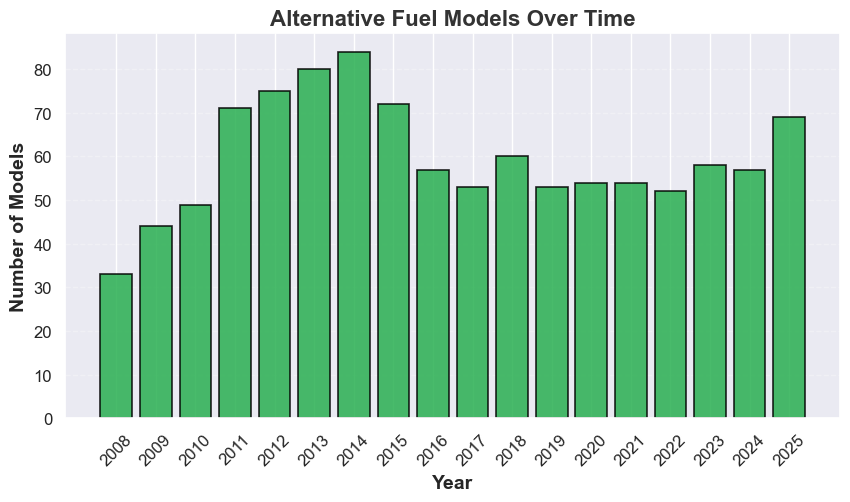

In [69]:
# Sample data (replace with actual data_count)
years = [f"20{i+8:02}" for i in range(len(data_count))]
plt.figure(figsize=(10, 5))  # Bigger size

# Create bars with better aesthetics
plt.bar(years, data_count, color="#29AF51FF", edgecolor="black", linewidth=1.2, alpha=0.85)

# Improve labels & title
plt.xlabel("Year", fontsize=14, fontweight="bold")
plt.ylabel("Number of Models", fontsize=14, fontweight="bold")
plt.title("Alternative Fuel Models Over Time", fontsize=16, fontweight="bold", color="#333")

# Improve x-axis ticks
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add a subtle grid
plt.grid(axis="y", linestyle="--", alpha=0.3)

# Show plot
plt.show()

In [70]:
total_count = []

for data in df_list:
  total_count.append(data['Vehicle_Model'].nunique())

proportion_value = []
for count, total in zip(data_count, total_count):
    proportion_value.append((count / total) * 100)

print(total_count)
for i in range(len(proportion_value)):
  print(f"{years[i]}: {proportion_value[i]:.2f}%")


[411, 450, 469, 484, 490, 513, 545, 580, 591, 603, 631, 638, 664, 665, 674, 702, 651, 548]
2008: 8.03%
2009: 9.78%
2010: 10.45%
2011: 14.67%
2012: 15.31%
2013: 15.59%
2014: 15.41%
2015: 12.41%
2016: 9.64%
2017: 8.79%
2018: 9.51%
2019: 8.31%
2020: 8.13%
2021: 8.12%
2022: 7.72%
2023: 8.26%
2024: 8.76%
2025: 12.59%


1. Peak in 2014: The number of unique alternative fuel models reached its highest at 84 models in 2014.
2. Decline after 2014: The count dropped significantly in 2015 and remained lower until 2018.
3. 2018 vs. Other Years:
  	* 2018 had 60 alternative fuel models, which is lower than the peak (2014: 84) but higher than 2016 & 2017.
  	*  The proportion of alternative fuel models in 2018 was 9.51%, slightly higher than 2017 (8.79%) but still below the peak years (2011-2014).

##### How much have vechicle classes improved in fuel economy (increased in mpg) per year?

In [ ]:
veh_group = {}
start_year = 2008

for i, df in enumerate(df_list):
  year = start_year + i
  mpg_by_class = df.groupby('Veh_Class')['Combined_Mpg'].mean()
  veh_group[year] = mpg_by_class
  
veh_group_df = pd.DataFrame(veh_group).T
veh_group_df = veh_group_df.sort_index(axis=1)
veh_group_df.T

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
Veh_Class,,,,,,,,,,,,,,,,,,
SUV,17.920807,18.114245,19.117444,19.327055,19.231481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
large car,18.323308,18.461538,18.270677,19.070922,18.880503,20.000000,20.888350,21.340909,21.805430,23.097959,24.337838,24.464844,25.798319,27.285714,26.104294,26.433333,26.557692,28.217391
midsize car,21.395604,21.816794,22.130282,23.220974,24.512367,26.289125,26.902050,26.817961,27.334831,29.040964,30.115909,31.016627,31.026882,30.078788,29.736364,28.800000,30.547009,30.606742
minivan,18.666667,19.000000,18.666667,19.666667,19.888889,20.080000,20.040000,20.040000,19.461538,25.714286,26.384615,27.619048,28.421053,32.222222,32.333333,32.333333,32.333333,32.300000
pickup,16.060837,16.160142,16.191860,16.391813,16.206250,15.821656,16.675214,17.884956,18.035714,17.931193,18.232558,18.266187,18.688525,18.626761,18.709877,18.728571,18.958015,18.975728
small SUV,NaN,NaN,NaN,NaN,NaN,22.166667,22.396501,23.189702,23.552058,23.223776,24.234927,25.052966,25.655870,26.321839,27.429084,27.865209,28.915058,30.630901
small car,21.054896,21.491117,22.133750,22.655509,23.322275,24.069507,24.979415,25.135276,25.760296,25.348917,25.611241,25.476773,25.018767,25.244318,24.635484,23.881517,23.930728,25.527363
special purpose,NaN,NaN,23.000000,16.333333,17.600000,19.111111,21.631579,19.555556,20.634146,19.894737,19.800000,19.901639,20.481481,19.535714,20.000000,20.916667,19.875000,20.125000
standard SUV,NaN,NaN,NaN,NaN,NaN,16.327731,16.784091,18.118143,19.311594,19.163194,19.341060,18.857143,19.757009,20.118557,20.331719,20.837209,22.679070,23.325069


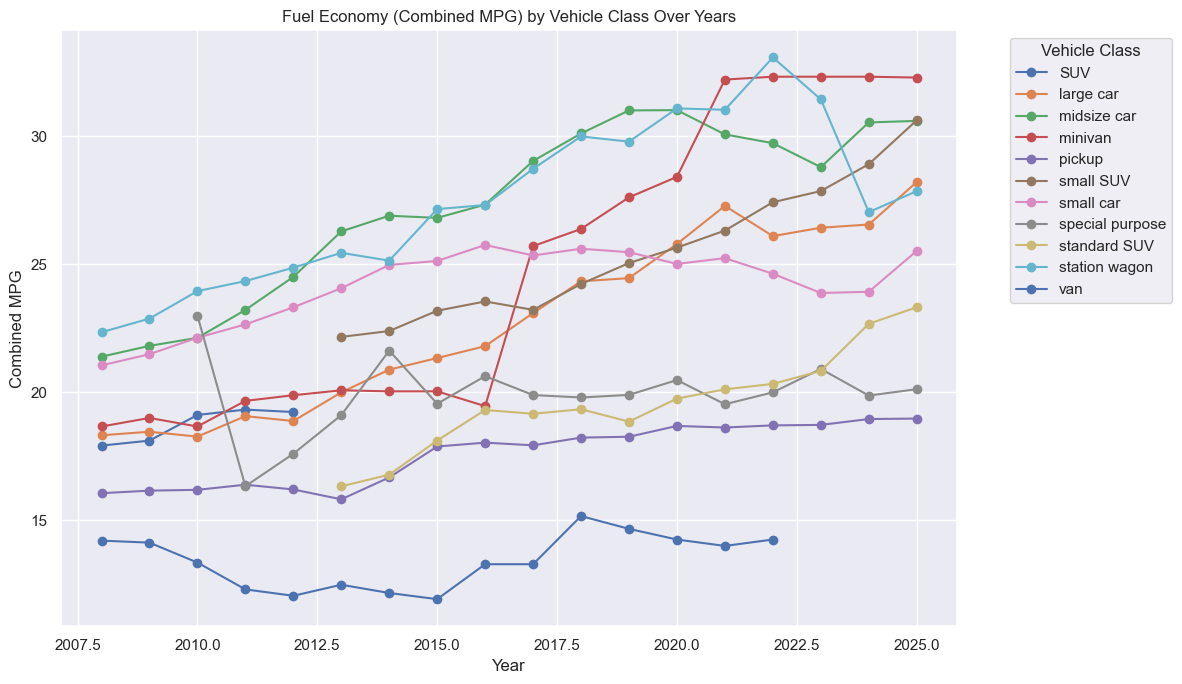

In [ ]:
plt.figure(figsize=(12, 7))
for column in veh_group_df.columns:
    plt.plot(veh_group_df.index, veh_group_df[column],marker='o', label=column)

plt.title("Fuel Economy (Combined MPG) by Vehicle Class Over Years")
plt.xlabel("Year")
plt.ylabel("Combined MPG")
plt.legend(title='Vehicle Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


- Minivan and Midsize Car are at the top — around 32-33 MPG
- Small SUV and Station Wagon are close behind (~30 MPG)
- Van sits at the bottom — hovering around 13–15 MPG
- Standard SUV and Pickup stay below 20 MPG until very recent years

In [ ]:
data = veh_group_df.T[[2008, 2025]]
data

,2008,2025
Veh_Class,,
SUV,17.920807,NaN
large car,18.323308,28.217391
midsize car,21.395604,30.606742
minivan,18.666667,32.300000
pickup,16.060837,18.975728
small SUV,NaN,30.630901
small car,21.054896,25.527363
special purpose,NaN,20.125000
standard SUV,NaN,23.325069


In [ ]:
data['improve'] = data[2025] - data[2008]
data

,2008,2025,improve
Veh_Class,,,
SUV,17.920807,NaN,NaN
large car,18.323308,28.217391,9.894083
midsize car,21.395604,30.606742,9.211137
minivan,18.666667,32.300000,13.633333
pickup,16.060837,18.975728,2.914892
small SUV,NaN,30.630901,NaN
small car,21.054896,25.527363,4.472467
special purpose,NaN,20.125000,NaN
standard SUV,NaN,23.325069,NaN


In [ ]:
data.loc['SUV', 2025] = (data.loc['small SUV', 2025] + data.loc['standard SUV', 2025]) / 2
data

KeyError: 2025

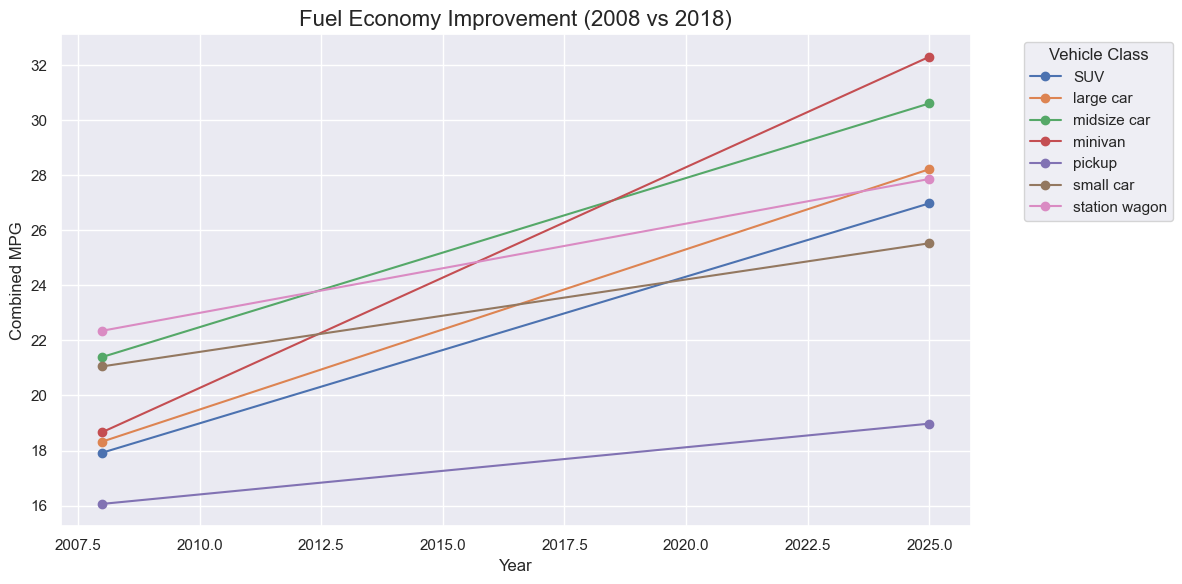

In [ ]:
mpg_df = data.T[['SUV','large car', 'midsize car', 'minivan', 'pickup', 'small car', 'station wagon']].head(2)

mpg_df

plt.figure(figsize=(12, 6))
for col in mpg_df.columns:
  plt.plot(mpg_df.index, mpg_df[col], marker='o', label=col)

plt.title('Fuel Economy Improvement (2008 vs 2018)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Combined MPG')
plt.legend(title="Vehicle Class", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

- Minivans improved the most: ~19 → 32 MPG
- Midsize Cars also strong: ~21 → 31 MPG
- Large Cars, SUVs, and Station Wagons improved by ~9 MPG
- Pickup Trucks saw minimal change: ~16 → 19 MPG
- Small Cars had the smallest gain despite starting strong

In [ ]:
# Calculate percentage improvement
improvement = ((data[2025] - data[2008]) / data[2008]) * 100

# Sort by improvement (optional)
improvement = improvement.sort_values(ascending=False)


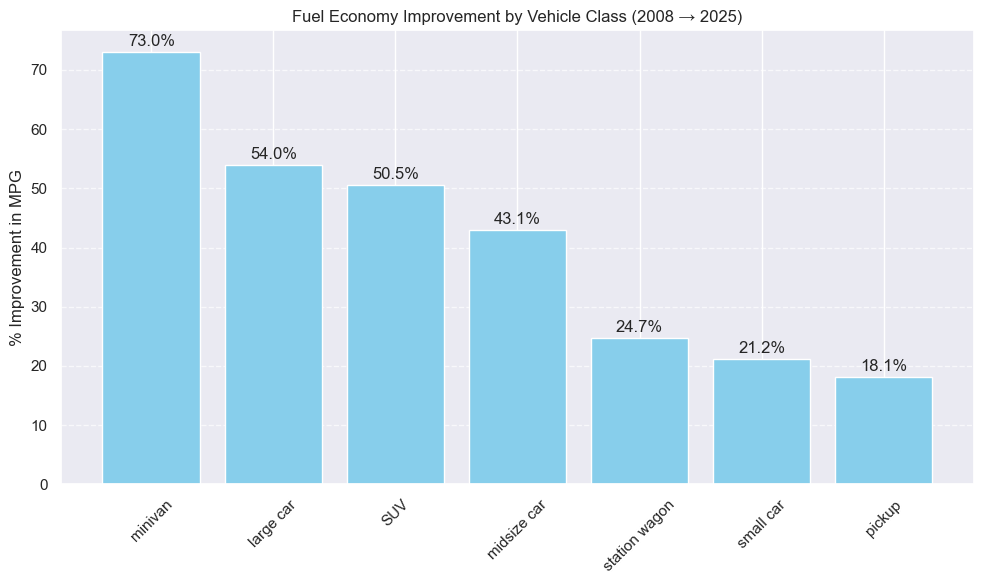

In [ ]:
plt.figure(figsize=(10,6))
bars = plt.bar(improvement.index, improvement.values, color='skyblue')
plt.xticks(rotation=45)
plt.ylabel('% Improvement in MPG')
plt.title('Fuel Economy Improvement by Vehicle Class (2008 → 2025)')

# Add labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Let's try to group them

In [ ]:
group_map = {
    "SUV": "SUV",
    "small SUV": "SUV",
    "standard SUV": "SUV",
    "large car": "large car",
    "midsize car": "midsize car",
    "small car": "small car",
    "minivan": "minivan",
    "van": "Van",
    "station wagon": "station wagon",
    "pickup": "Pickup",
    "special purpose": "Other",
}

group_data = {}
for year, columns in veh_group.items():
  group_data[year] = {}
  for cls, mpg in columns.items():
    group = group_map.get(cls)
    if group not in group_data[year]:
      group_data[year][group] = []
    group_data[year][group].append(mpg)
    


In [ ]:
df_grouped = pd.DataFrame({
    year: {group: sum(vals) / len(vals) for group, vals in data.items()}
    for year, data in group_data.items()
}).T

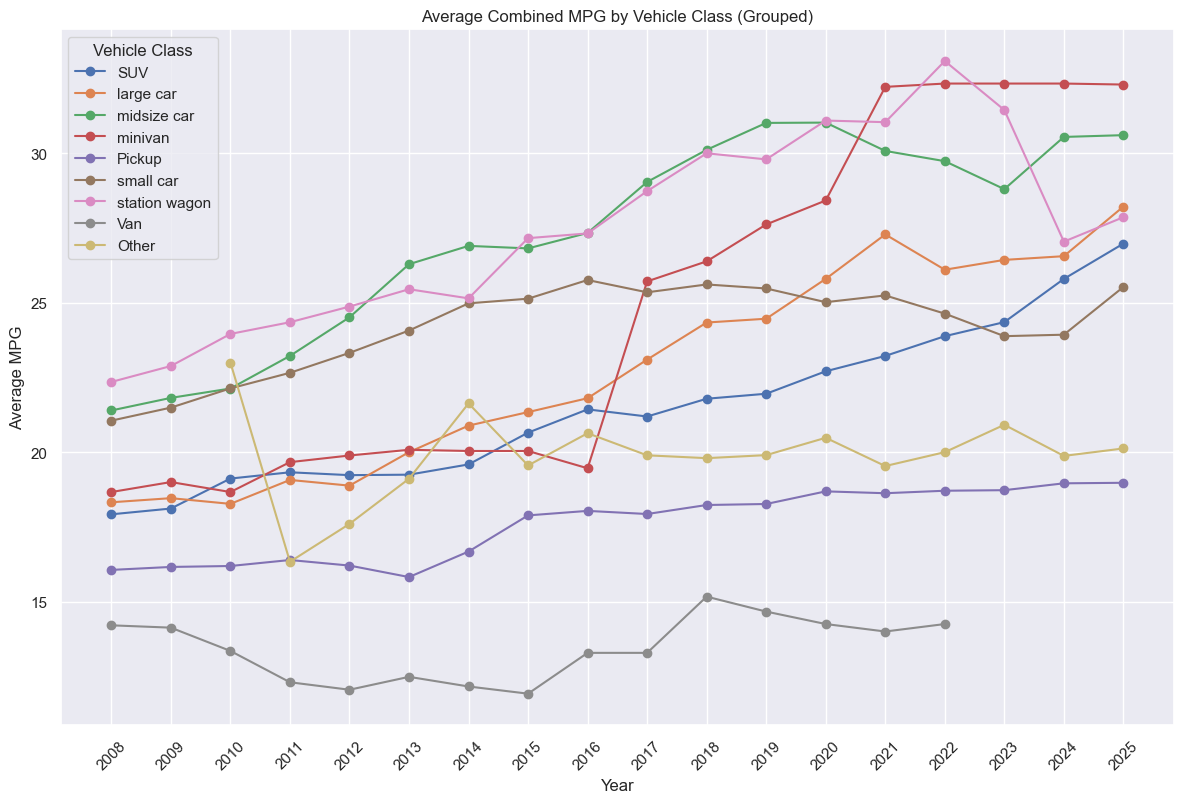

In [ ]:
plt.figure(figsize=(12, 8))
for col in df_grouped.columns:
    plt.plot(df_grouped.index, df_grouped[col], marker='o', label=col)

plt.title("Average Combined MPG by Vehicle Class (Grouped)")
plt.xlabel("Year")
plt.ylabel("Average MPG")
plt.legend(title="Vehicle Class")
plt.grid(True)
plt.tight_layout()
plt.xticks(df_grouped.index, rotation=45)
plt.show()

##### What are the characteristics of SmartWay vechicles? Have they changed over time? (mpg, greenhouse gas)

SmartWay

![SmartWay](./img/smartway.png)

In [ ]:
df_list[0]['Smartway'].value_counts()

Smartway
No     1582
Yes     625
Name: count, dtype: int64

In [ ]:
df = df_list[0].query('Smartway == "Yes"')
df.describe()

,Engine_Displacement_L,Engine_Cylinders,Air_Pollution_Score,City_Mpg,Hwy_Mpg,Combined_Mpg,Greenhouse_Gas_Score,Combined_Co2
count,625.000000,625.000000,625.00000,625.00000,625.000000,625.000000,625.000000,625.000000
mean,2.492320,4.664000,6.99680,21.45760,28.880000,24.201600,7.027200,373.856000
std,0.584993,0.934935,1.14459,3.49751,3.091552,3.086519,0.803176,41.647657
min,1.300000,4.000000,6.00000,17.00000,22.000000,20.000000,6.000000,195.000000
25%,2.000000,4.000000,6.00000,20.00000,27.000000,22.000000,6.000000,357.000000
50%,2.400000,4.000000,7.00000,21.00000,29.000000,24.000000,7.000000,372.000000
75%,2.700000,6.000000,7.00000,23.00000,31.000000,25.000000,7.000000,406.000000
max,5.000000,8.000000,9.50000,48.00000,45.000000,46.000000,10.000000,446.000000


In [ ]:
df_list[-1]['Smartway'].value_counts()

Smartway
No       1651
Yes       146
Elite       4
Name: count, dtype: int64

In [ ]:
rf = df_list[-1].query('Smartway in ["Yes", "Elite"]')

In [ ]:
new_data = []

for data in df_list:
	new_data.append(data.query('Smartway in ["Yes", "Elite"]'))

In [ ]:
describe_data = []
for data in new_data:
  describe_data.append(data[['Greenhouse_Gas_Score', 'Air_Pollution_Score', 'Combined_Mpg']].mean())	

In [ ]:
describe_data[0]

Greenhouse_Gas_Score     7.0272
Air_Pollution_Score      6.9968
Combined_Mpg            24.2016
dtype: float64

In [ ]:
new_data[6]['Smartway'].count()

np.int64(607)

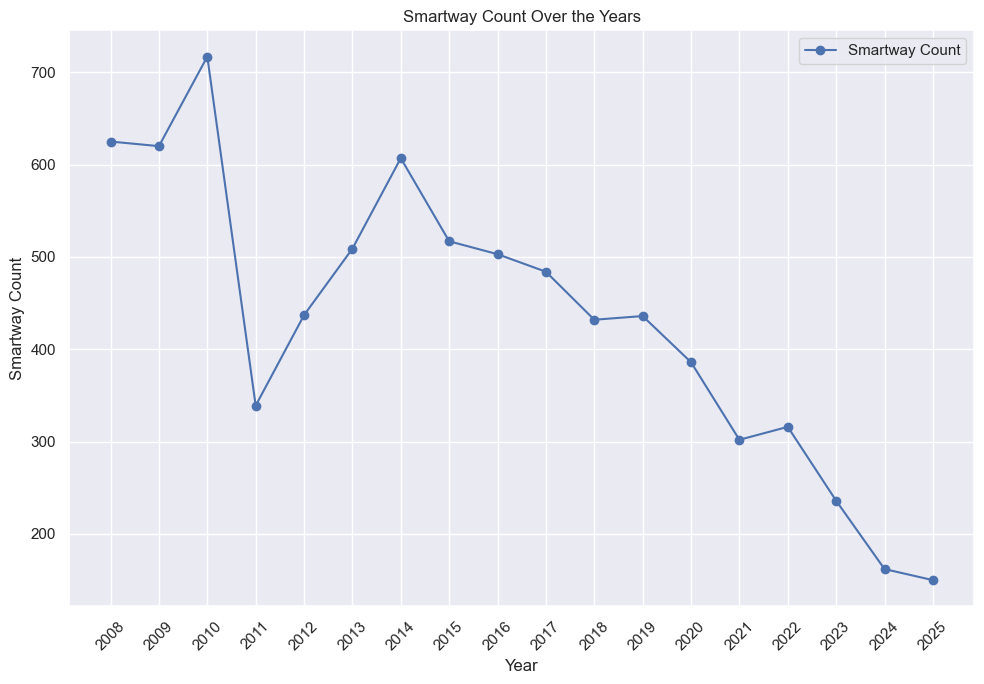

In [ ]:

years = []
counts = []

plt.figure(figsize=(10, 7))

# Gather x and y values
for i, data in enumerate(new_data):
    year = i + 2008
    count = data['Smartway'].count()
    years.append(year)
    counts.append(count)

# Plot once to connect points
plt.plot(years, counts, marker='o', linestyle='-', color='b', label='Smartway Count')

plt.title("Smartway Count Over the Years")
plt.xlabel("Year")
plt.ylabel("Smartway Count")
plt.grid(True)
plt.xticks(years, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

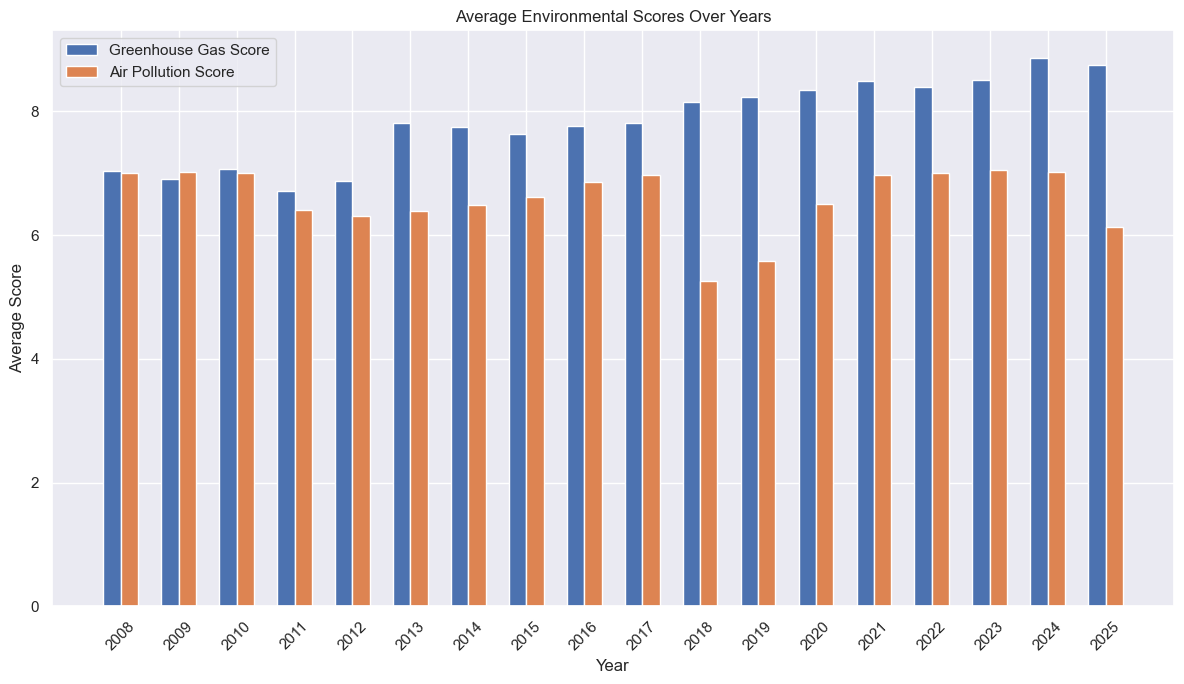

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

years = np.array([i + 2008 for i in range(len(describe_data))])

# Extract each metric over the years
ghg_scores = [d['Greenhouse_Gas_Score'] for d in describe_data]
air_pollution_scores = [d['Air_Pollution_Score'] for d in describe_data]

# Plotting
plt.figure(figsize=(12, 7))
width = 0.3

plt.bar(years - width/2, ghg_scores, label='Greenhouse Gas Score', width=width)
plt.bar(years + width/2, air_pollution_scores, label='Air Pollution Score', width=width)

plt.title("Average Environmental Scores Over Years")
plt.xlabel("Year")
plt.ylabel("Average Score")
plt.grid(True, axis='y')
plt.legend()
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()


The average greenhouse gas score has increased from 7 to 8.2, but air pollution average score has dropped from 6.9 to 5.2. This seems strange - what does the drop in smog rating means?

it says
>Model year 2018 and later: The smog rating chart has been recalibrated to reflect new, more stringent Tier 3 emission standards. This is good news, as Tier 3 cars and trucks are much cleaner. This recalibration makes better use of the entire smog rating scale and allows for more useful comparisons between vehicles. **Please note: Even though ratings appear to be going down, vehicles are not getting dirtier. A MY 2018 and later smog rating of 3 is about the same as a MY 2017 smog rating of 6.**

####  What features are associated with better fuel economy(mpg)?

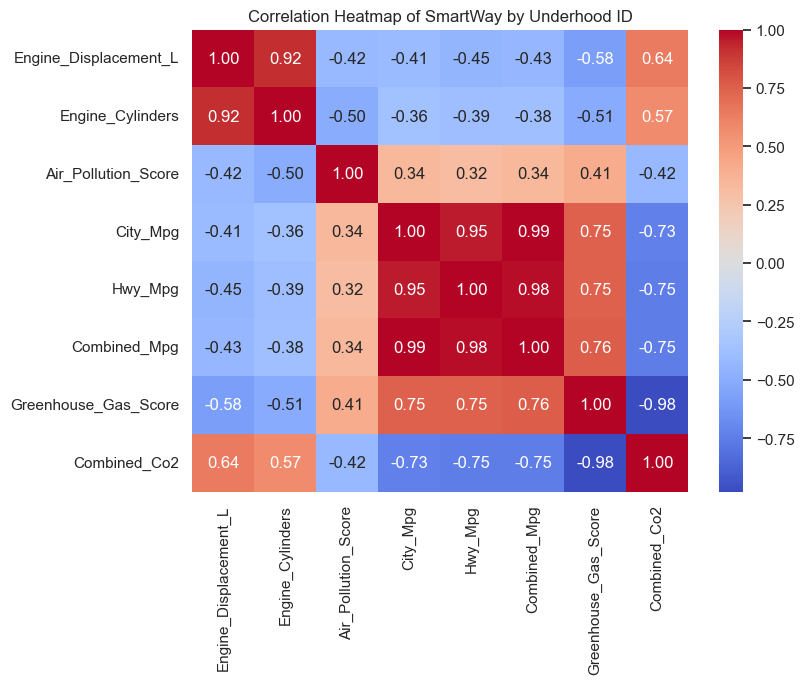

In [ ]:
new = df_list[-1]

corr_matrix = new.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of SmartWay by Underhood ID")
plt.show()


- The minimum, maximum and average mileage for city, highway and combined has increased from 2008 to 2025
- This is also reflected in low air pollution and greenhouse gas score
- With less value of Engine Cylinders and displacement L , the average mileage has increased from 2008 to 2018